# Decision Tree Regression

## Importing the libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [17]:
dataset = pd.read_csv('bottle.csv')
Data=dataset[['Salnty', 'T_degC']]
dataset = dataset[:][:500]
print(dataset.describe())

          Cst_Cnt     Btl_Cnt       Depthm  ...  pH2  pH1  DIC Quality Comment
count  500.000000  500.000000   500.000000  ...  0.0  0.0                  0.0
mean     8.548000  250.500000   341.490000  ...  NaN  NaN                  NaN
std      4.570062  144.481833   355.166886  ...  NaN  NaN                  NaN
min      1.000000    1.000000     0.000000  ...  NaN  NaN                  NaN
25%      5.000000  125.750000    55.000000  ...  NaN  NaN                  NaN
50%      9.000000  250.500000   200.000000  ...  NaN  NaN                  NaN
75%     12.250000  375.250000   598.500000  ...  NaN  NaN                  NaN
max     16.000000  500.000000  1352.000000  ...  NaN  NaN                  NaN

[8 rows x 72 columns]


In [18]:
print(dataset.head())

   Cst_Cnt  Btl_Cnt       Sta_ID  ... pH2  pH1  DIC Quality Comment
0        1        1  054.0 056.0  ... NaN  NaN                  NaN
1        1        2  054.0 056.0  ... NaN  NaN                  NaN
2        1        3  054.0 056.0  ... NaN  NaN                  NaN
3        1        4  054.0 056.0  ... NaN  NaN                  NaN
4        1        5  054.0 056.0  ... NaN  NaN                  NaN

[5 rows x 74 columns]


In [0]:
X = np.array(dataset['Salnty']).reshape(-1,1)
y = np.array(dataset['T_degC']).reshape(-1,1)

## Plotting data salanity vs Temperature

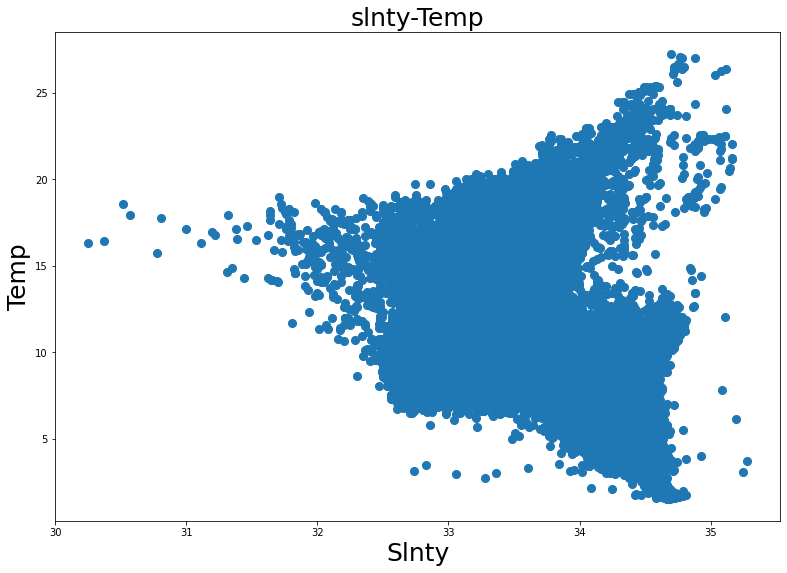

In [20]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(13, 9))
plt.scatter(Data["Salnty"], Data["T_degC"],s=65)
plt.xlabel('Slnty',fontsize=25)
plt.ylabel('Temp',fontsize=25)
plt.title('slnty-Temp',fontsize=25)
plt.show()

## Dealing with NAN values

In [0]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X = imputer.transform(X)
imputery = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputery.fit(y)
y= imputery.transform(y)

## Splitting data into training and Testing sets

## Training the Decision Tree Regression model on the whole dataset

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [23]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

## Predicting a new result

In [30]:
y_pred=regressor.predict(X_test)
print([y_test,y_pred])

[array([[ 3.43      ],
       [11.95      ],
       [11.58      ],
       [ 9.75      ],
       [ 5.11      ],
       [ 8.71      ],
       [11.52      ],
       [ 7.13      ],
       [10.2       ],
       [11.64      ],
       [ 4.44      ],
       [11.99      ],
       [ 7.98      ],
       [11.23      ],
       [ 5.09      ],
       [ 8.25      ],
       [ 3.51      ],
       [ 9.79      ],
       [11.64      ],
       [ 8.83      ],
       [ 5.21      ],
       [ 5.2       ],
       [ 4.67      ],
       [ 7.71      ],
       [ 6.32      ],
       [ 3.04      ],
       [ 6.8       ],
       [ 4.8       ],
       [10.14      ],
       [ 8.06      ],
       [ 4.85      ],
       [ 4.21      ],
       [10.52      ],
       [12.63      ],
       [ 3.18      ],
       [ 6.11      ],
       [11.5       ],
       [ 8.2       ],
       [11.49      ],
       [ 5.49      ],
       [11.13      ],
       [ 6.05      ],
       [ 3.89      ],
       [12.23      ],
       [ 7.71      ],
       [1

## Visualising the Decision Tree Regression results 

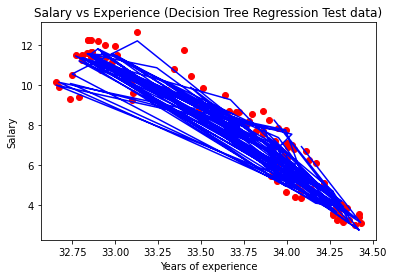

In [27]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('Salary vs Experience (Decision Tree Regression Test data)')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()

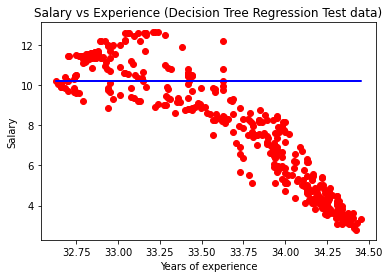

In [28]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(y_train), color = 'blue')
plt.title('Salary vs Experience (Decision Tree Regression Test data)')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()

## Model Evaluation

In [29]:
from sklearn.metrics import mean_squared_error,r2_score
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

RMSE Score for Test set: 1.0
R2 Score for Test set: 0.88
